In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from datetime import datetime 
import cv2
from PIL import Image
from keras import backend, optimizers

In [2]:
tf.config.set_visible_devices([], 'GPU')

In [3]:
image_directory = 'Dataset/Train/images/'
mask_directory = 'Dataset/Train/masks/'

In [4]:
SIZE = 256
image_dataset = [] 
mask_dataset = []

In [5]:
images = os.listdir(image_directory)
for i, image_name in enumerate(images):    
    if (image_name.split('.')[1] == 'tif'):
        #print(image_directory+image_name)
        image = cv2.imread(image_directory+image_name, 1)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))

In [6]:
masks = os.listdir(mask_directory)
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'tif'):
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image))

In [7]:
image_dataset = np.array(image_dataset)/255.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.1, random_state = 0)

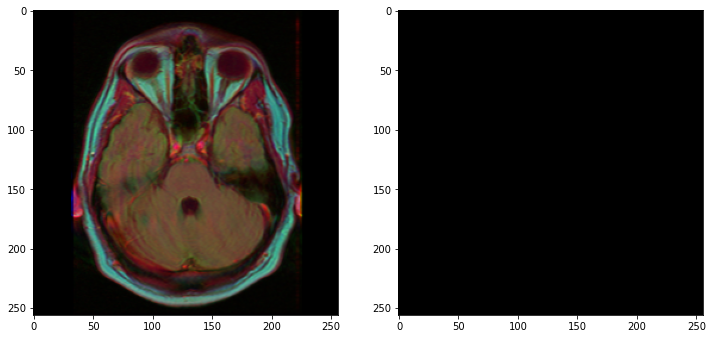

In [9]:
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256, 3)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()

In [10]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]
num_labels = 1  #Binary
input_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
batch_size = 8

In [11]:
from focal_loss import BinaryFocalLoss

In [12]:
from models import Attention_UNet, dice_coef, dice_coef_loss, jacard_coef

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

 rmalization)                   )                                                                 
                                                                                                  
 activation_8 (Activation)      (None, 16, 16, 1024  0           ['batch_normalization_8[0][0]']  
                                )                                                                 
                                                                                                  
 conv2d_9 (Conv2D)              (None, 16, 16, 1024  9438208     ['activation_8[0][0]']           
                                )                                                                 
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 16, 16, 1024  4096       ['conv2d_9[0][0]']               
 rmalization)                   )                                                                 
          

 conv2d_16 (Conv2D)             (None, 256, 256, 64  110656      ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 batch_normalization_16 (BatchN  (None, 256, 256, 64  256        ['conv2d_16[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 activation_16 (Activation)     (None, 256, 256, 64  0           ['batch_normalization_16[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 256, 256, 64  36928       ['activation_16[0][0]']          
          

In [13]:
att_unet_model = Attention_UNet(input_shape)

att_unet_model.compile(optimizer=Adam(lr = 1e-2), loss=BinaryFocalLoss(gamma=2), 
              metrics=['accuracy', jacard_coef])


print(att_unet_model.summary())

Model: "Attention_UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_19 (BatchN  (None, 256, 256, 64  256        ['conv2d_19[0][0]']              
 ormalization)                  )                                                    

 ormalization)                  )                                                                 
                                                                                                  
 activation_27 (Activation)     (None, 16, 16, 1024  0           ['batch_normalization_27[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_28 (Conv2D)             (None, 16, 16, 1024  9438208     ['activation_27[0][0]']          
                                )                                                                 
                                                                                                  
 batch_normalization_28 (BatchN  (None, 16, 16, 1024  4096       ['conv2d_28[0][0]']              
 ormalization)                  )                                                                 
          

C:\Users\Public\Miniconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 batch_normalization_30 (BatchN  (None, 32, 32, 512)  2048       ['conv2d_33[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 concatenate_4 (Concatenate)    (None, 32, 32, 1536  0           ['up_sampling2d_5[0][0]',        
                                )                                 'batch_normalization_30[0][0]'] 
                                                                                                  
 conv2d_34 (Conv2D)             (None, 32, 32, 512)  7078400     ['concatenate_4[0][0]']          
                                                                                                  
 batch_normalization_31 (BatchN  (None, 32, 32, 512)  2048       ['conv2d_34[0][0]']              
 ormalization)                                                                                    
          

 conv2d_transpose_2 (Conv2DTran  (None, 64, 64, 128)  147584     ['conv2d_45[0][0]']              
 spose)                                                                                           
                                                                                                  
 conv2d_44 (Conv2D)             (None, 64, 64, 128)  65664       ['activation_22[0][0]']          
                                                                                                  
 add_2 (Add)                    (None, 64, 64, 128)  0           ['conv2d_transpose_2[0][0]',     
                                                                  'conv2d_44[0][0]']              
                                                                                                  
 activation_40 (Activation)     (None, 64, 64, 128)  0           ['add_2[0][0]']                  
                                                                                                  
 conv2d_46

 lambda_3 (Lambda)              (None, 256, 256, 64  0           ['up_sampling2d_10[0][0]']       
                                )                                                                 
                                                                                                  
 multiply_3 (Multiply)          (None, 256, 256, 64  0           ['lambda_3[0][0]',               
                                )                                 'activation_20[0][0]']          
                                                                                                  
 conv2d_54 (Conv2D)             (None, 256, 256, 64  4160        ['multiply_3[0][0]']             
                                )                                                                 
                                                                                                  
 up_sampling2d_11 (UpSampling2D  (None, 256, 256, 12  0          ['activation_43[0][0]']          
 )        

In [14]:
start2 = datetime.now() 
att_unet_history = att_unet_model.fit(X_train, y_train, 
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(X_test, y_test ), 
                    shuffle=False,
                    epochs=3)
stop2 = datetime.now()

Epoch 1/3
79/79 [==============================] - 1195s 15s/step - loss: 0.1098 - accuracy: 0.8893 - jacard_coef: 0.0218 - val_loss: 0.0503 - val_accuracy: 0.9834 - val_jacard_coef: 0.0171
Epoch 2/3
79/79 [==============================] - 1031s 13s/step - loss: 0.0410 - accuracy: 0.9844 - jacard_coef: 0.0253 - val_loss: 0.0308 - val_accuracy: 0.9834 - val_jacard_coef: 0.0204
Epoch 3/3
79/79 [==============================] - 958s 12s/step - loss: 0.0252 - accuracy: 0.9846 - jacard_coef: 0.0298 - val_loss: 0.0212 - val_accuracy: 0.9851 - val_jacard_coef: 0.0256


In [15]:
execution_time_Att_Unet = stop2-start2
print("Attention UNet execution time is: ", execution_time_Att_Unet)

att_unet_model.save('Attention_UNet_3epochs_B_focal.hdf5')

Attention UNet execution time is:  0:53:04.722542


In [16]:
import pandas as pd    

In [17]:
att_unet_history_df = pd.DataFrame(att_unet_history.history) 

In [18]:
with open('att_unet_history_df.csv', mode='w') as f:
    att_unet_history_df.to_csv(f)

In [19]:
history = att_unet_history

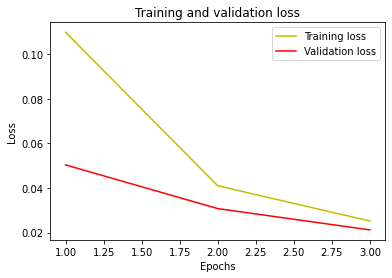

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

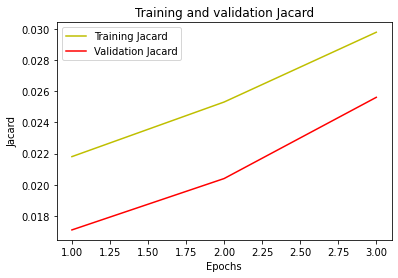

In [21]:
acc = history.history['jacard_coef']
val_acc = history.history['val_jacard_coef']
plt.plot(epochs, acc, 'y', label='Training Jacard')
plt.plot(epochs, val_acc, 'r', label='Validation Jacard')
plt.title('Training and validation Jacard')
plt.xlabel('Epochs')
plt.ylabel('Jacard')
plt.legend()
plt.show()

In [22]:
model_path = "Attention_UNet_3epochs_B_focal.hdf5"
model = tf.keras.models.load_model(model_path, compile=False)

In [30]:
import random
test_img_number = random.randint(0, X_test.shape[0]-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]

test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)


1/1 [==============================] - 0s 314ms/step


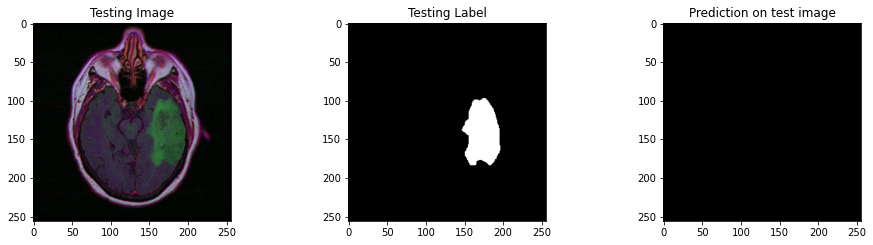

In [31]:
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img, cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

In [32]:
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(ground_truth[:,:,0], prediction)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.4761734


In [33]:
import pandas as pd

IoU_values = []
for img in range(0, X_test.shape[0]):
    temp_img = X_test[img]
    ground_truth=y_test[img]
    temp_img_input=np.expand_dims(temp_img, 0)
    prediction = (model.predict(temp_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
    
    IoU = MeanIoU(num_classes=n_classes)
    IoU.update_state(ground_truth[:,:,0], prediction)
    IoU = IoU.result().numpy()
    IoU_values.append(IoU)

    print(IoU)

1/1 [==============================] - 0s 316ms/step
1.0
1/1 [==============================] - 0s 318ms/step
0.7357926
1/1 [==============================] - 0s 318ms/step
1.0
1/1 [==============================] - 0s 382ms/step
0.49906158
1/1 [==============================] - 0s 382ms/step
0.5789455
1/1 [==============================] - 0s 318ms/step
0.49705505
1/1 [==============================] - 0s 318ms/step
0.48728943
1/1 [==============================] - 0s 323ms/step
0.49166256
1/1 [==============================] - 0s 376ms/step
0.4989853
1/1 [==============================] - 0s 315ms/step
1.0
1/1 [==============================] - 0s 361ms/step
0.49047852
1/1 [==============================] - 0s 353ms/step
0.49821472
1/1 [==============================] - 0s 369ms/step
0.48628235
1/1 [==============================] - 0s 349ms/step
1.0
1/1 [==============================] - 0s 346ms/step
0.49887085
1/1 [==============================] - 0s 357ms/step
0.5136398
1/1 [===